# Визуализация данных

Задача визуализации представляет собой частный случай задачи понижения размерности матрицы признаков до двух (или трех) для того, чтобы распределение объектов можно было отобразить на двумерной плоскости. Рассмотрим работу различных методов понижения размерности на примере датасета digits.

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Загрузка выборки

Датасет digits представляет собой базу из 5620 картинок размером 8х8 пикселов 10 рукописных цифр. Таким образом перед нами задача многоклассовой (10 классов) классификации, каждый объект которой содержит 8х8 = 64 признака.

In [4]:
digits  =  datasets.load_digits()

In [5]:
# Краткое описание датасета
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [6]:
# Выведем на экран содержимое первого элемента
print('target:', digits.target[0])
print('features: \n', digits.data[0])
print('number of features:', len(digits.data[0]))

target: 0
features: 
 [  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
number of features: 64


Таким образом, первый элемент является цифрой нуль, содержит 64 признака (яркости определенного пиксела), записанных в массив.

## Визуализация объектов выборки

In [7]:
# Длина массива признаков
digits.data[0].shape

(64,)

In [8]:
# Преобразуем массив в матрицу
print(digits.data[0].reshape(8,8))

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [9]:
# Размерность преобразованной матрицы
digits.data[0].reshape(8,8).shape

(8, 8)

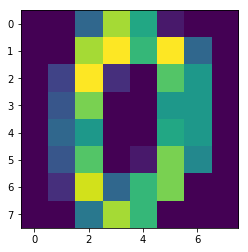

In [10]:
# Выведем матрицу на экран
pylab.imshow(digits.data[0].reshape(8,8))

In [11]:
# Названия ключей датасета
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [12]:
# Распечатаем матрицу картинки, которая соответствует матрице яркости пикселов
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


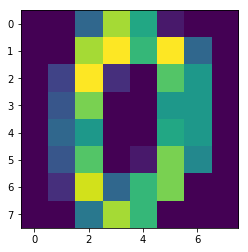

In [13]:
# Выведем картинку на экран
pylab.imshow(digits.images[0])

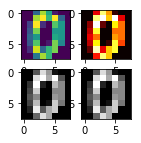

In [15]:
# Первый элемент массива в разных цветовых картах
pyplot.figure(figsize(2, 2))

pyplot.subplot(2, 2, 1)
pylab.imshow(digits.images[0])

pyplot.subplot(2, 2, 2)
pylab.imshow(digits.images[0], cmap = 'hot')

pyplot.subplot(2, 2, 3)
pylab.imshow(digits.images[0], cmap = 'gray')

pyplot.subplot(2, 2, 4)
pylab.imshow(digits.images[0], cmap = 'gray', interpolation = 'nearest')

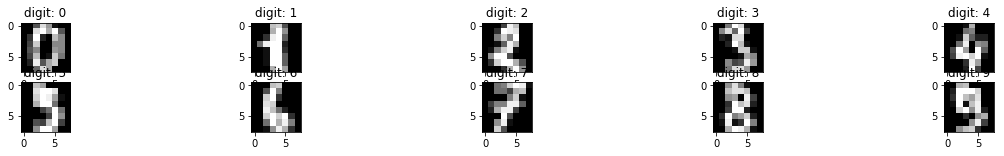

In [16]:
# Выведем первые десять цифр на экран
pyplot.figure(figsize(20, 2))

for plot_number, plot in enumerate(digits.images[:10]):
    pyplot.subplot(2, 5, plot_number + 1)
    pylab.imshow(plot, cmap = 'gray')
    pylab.title('digit: ' + str(digits.target[plot_number]))

## Понижение размерности

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from collections import  Counter

In [19]:
# Выделим подвыборку из 1000 объектов
data = digits.data[:1000]
labels = digits.target[:1000]

In [20]:
# Количество объектов в каждом классе
print(Counter(labels))

Counter({3: 104, 1: 102, 6: 101, 2: 100, 5: 100, 0: 99, 7: 99, 9: 99, 4: 98, 8: 98})


<BarContainer object of 10 artists>

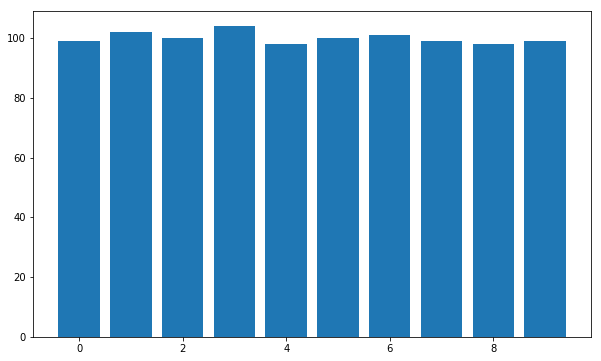

In [21]:
# Проверим визуально сбалансированность выборки
pylab.figure(figsize = (10, 6))
pylab.bar(Counter(labels).keys(), Counter(labels).values())

Видно, что выборка сбалансирована по классам.

In [22]:
# Создаем классификатор kNN
classifier = KNeighborsClassifier()

In [23]:
# Обучим классификатор на выборке
classifier.fit(data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
print(classification_report(classifier.predict(data), labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       1.00      0.97      0.99       105
          2       1.00      1.00      1.00       100
          3       1.00      0.98      0.99       106
          4       1.00      1.00      1.00        98
          5       0.99      1.00      0.99        99
          6       1.00      1.00      1.00       101
          7       0.99      0.99      0.99        99
          8       0.97      0.99      0.98        96
          9       0.96      0.98      0.97        97

avg / total       0.99      0.99      0.99      1000



По приведенным оценкам видно, что мы можем правильно классифицировать практически всю выборку (99%).

## Линейные методы понижения размерности

### Метод случайных проекций (Random projection)

In [25]:
from sklearn import random_projection

In [26]:
# Для отображения объектов на плоскости понизим количество признаков до двух
projection = random_projection.SparseRandomProjection(n_components = 2, random_state = 0)
data_2d_rp = projection.fit_transform(data)

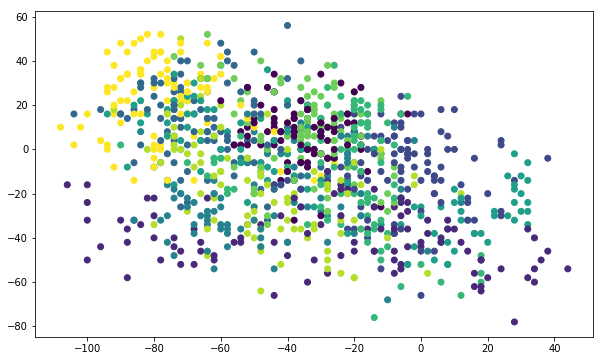

In [27]:
# Отобразим объекты с новым набором признаков на плоскости
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c = labels)

Визуально можно определить, что все десять классов между собой перемешаны, что говорит о низком качестве понижения размерности.

In [28]:
classifier.fit(data_2d_rp, labels)
print(classification_report(classifier.predict(data_2d_rp), labels))

             precision    recall  f1-score   support

          0       0.74      0.47      0.58       154
          1       0.75      0.58      0.65       131
          2       0.67      0.59      0.63       113
          3       0.71      0.51      0.60       144
          4       0.38      0.56      0.45        66
          5       0.42      0.53      0.47        79
          6       0.52      0.57      0.55        93
          7       0.35      0.51      0.42        69
          8       0.37      0.58      0.45        62
          9       0.62      0.69      0.65        89

avg / total       0.60      0.55      0.56      1000



Качество классификатора на объектах с преобразованными признаками упало до 60%. (это достаточно низкая оценка по сравнению с 99%)

### Метод главных компонент (Principal component analysis - PCA)

In [29]:
from sklearn.decomposition import RandomizedPCA

In [30]:
# Для отображения объектов на плоскости понизим количество признаков до двух
pca = RandomizedPCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(data)

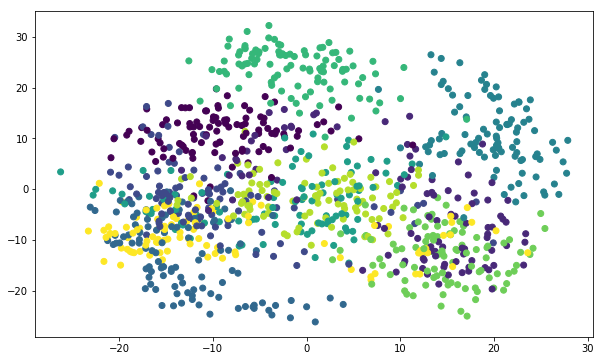

In [31]:
# Отобразим объекты с новым набором признаков на плоскости
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = labels)

Качество изображения стало намного лучше. На рисунке появились области, содержащие различные классы объектов.

In [32]:
classifier.fit(data_2d_pca, labels)
print(classification_report(classifier.predict(data_2d_pca), labels))

             precision    recall  f1-score   support

          0       0.83      0.73      0.77       113
          1       0.56      0.54      0.55       105
          2       0.59      0.56      0.58       105
          3       0.77      0.79      0.78       101
          4       0.95      0.93      0.94       100
          5       0.56      0.54      0.55       104
          6       0.92      0.93      0.93       100
          7       0.75      0.71      0.73       104
          8       0.62      0.66      0.64        92
          9       0.52      0.67      0.58        76

avg / total       0.71      0.71      0.71      1000



Классификатор определяет 71%, что намного лучше чем в предыдущем случае.

## Нелинейные методы понижения размерности

### Многомерное шкалирование (Multidimensional scaling - MDS)

In [33]:
from sklearn import manifold

In [34]:
# Понижение размерности до двух
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data)

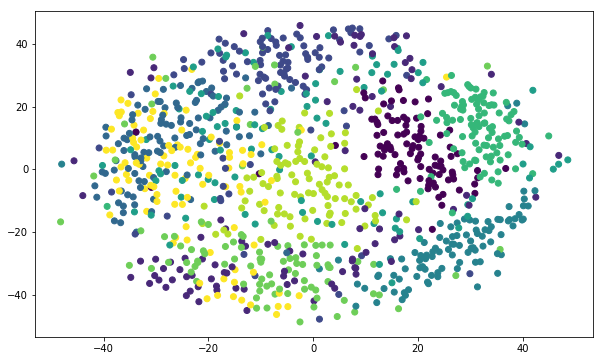

In [35]:
# Отобразим объекты на плоскости
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = labels)

In [36]:
classifier.fit(data_2d_mds, labels)
print(classification_report(classifier.predict(data_2d_mds), labels))

             precision    recall  f1-score   support

          0       0.90      0.84      0.87       106
          1       0.64      0.58      0.60       113
          2       0.74      0.70      0.72       105
          3       0.80      0.61      0.69       136
          4       0.91      0.85      0.88       105
          5       0.29      0.45      0.35        64
          6       0.90      0.85      0.88       107
          7       0.60      0.67      0.63        88
          8       0.84      0.78      0.81       105
          9       0.47      0.66      0.55        71

avg / total       0.74      0.71      0.72      1000



Видно, что понижение размерности с помощью нелинейного алгоритма дает немного лучшее качество (74%) по сравнению с линейными методами.

### Метод  t - SNE (t-distributed stochastic neighbor embedding)

In [37]:
# Понижаем количество признаков до двух
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)

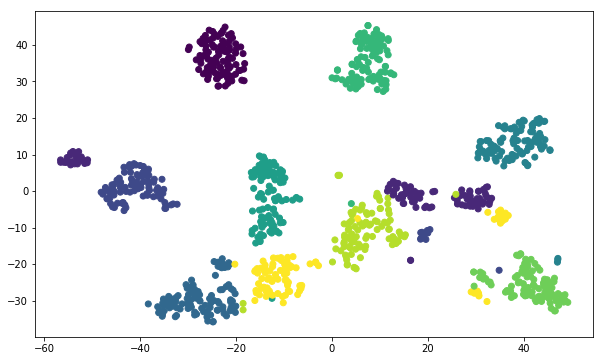

In [38]:
# Отобразим объекты
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)

 Видим, что это, наверное, самая лучшая картинка из всех, которую мы получили. Здесь очень легко убедиться в том, что объекты разных цветов или объекты разных классов находятся довольно далеко друг от друга.

In [39]:
classifier.fit(data_2d_tsne, labels)
print(classification_report(classifier.predict(data_2d_tsne), labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       0.98      0.99      0.99       101
          2       0.99      1.00      0.99        99
          3       1.00      0.97      0.99       107
          4       1.00      1.00      1.00        98
          5       0.99      1.00      0.99        99
          6       0.99      1.00      1.00       100
          7       0.99      0.99      0.99        99
          8       0.97      0.96      0.96        99
          9       0.98      0.98      0.98        99

avg / total       0.99      0.99      0.99      1000



Видим, что действительно, качество в среднем равняется 99% по метрике accuracy, то есть классификатор правильно классифицирует практически всю выборку. Таким образом можно сделать вывод о том, что метод понижения размерности признаков t-SNE является наилучшим.